In [1]:
def bissecao(f, a, b, epsilon, maxIter = 50):
    """Executa o método da bisseção para achar o zero de f no intervalo 
       [a,b] com precisão epsilon. O método executa no máximo maxIter
       iterações.
       Retorna uma tupla (houveErro, raiz), onde houveErro é booleano.
    """
    ## Inicializar as variáveis Fa e Fb
    Fa = f(a) 
    Fb = f(b)
    
    ## Teste para saber se a função muda de sinal. Se não mudar, mostrar
    ## mensagem de erro
    if (Fa * Fb) > 0:
        ## Mostrar mensagem
        print("Erro! A função não muda de sinal.")
        return (True, None)
    
    ## Mostra na tela cabeçalho da tabela
    print("k\t  a\t\t  fa\t\t  b\t\t  fb\t\t  x\t\t  fx\t\tintervX")
    
    ## Inicializa tamanho do intervalo intervX usando a função abs, x e Fx
    intervX = abs(b - a)
    x = (b + a)/2.0
    Fx = f(x)
    
    ## Mostra dados de inicialização
    print("-\t%e\t%e\t%e\t%e\t%e\t%e\t%e" % (a, Fa, b, Fb, x, Fx, intervX))
    
    ## Teste se intervalo já é do tamanho da precisão e retorna a raiz sem erros
    if(intervX <= epsilon):
        return (False, x)
    
    
    ## Iniciliza o k
    k = 0
    
    ## laço
    while k <= maxIter:
        ## Testes para saber se a raiz está entre a e x ou entre x e b e atualiza
        ## as variáveis apropriadamente
        
        if(f(a) * f(x) < 0):
            b = x
        else:
            a = x
                
        
        ## Atualiza intervX, x, e Fx
        intervX = abs(b - a)
        x = (b + a)/2.0
        Fx = f(x)
        
        ## Mostra valores na tela
        print("%d\t%e\t%e\t%e\t%e\t%e\t%e\t%e"%(k, a, Fa, b, Fb, x, Fx, intervX))
        
        ## Teste do critério de parada (usando apenas o tamanho do intervalo)
        
        if(intervX <= epsilon):
            return (False, x)
        
        ## Atualiza o k
        k = k+1
    ## Se chegar aqui é porque o número máximo de iterações foi atingido
    ## Mostrar uma mensagem de erro e retorna que houve erro e a última raiz encontrada
    print("ERRO! número máximo de iterações atingido.")
    return (True, x)

In [2]:
def false_pos(f, a, b, epsilon, maxIter = 50):
    """Executa o método da Posição Falsa para achar o zero de f no intervalo 
       [a,b] com precisão epsilon. O método executa no máximo maxIter
       iterações.
       Retorna uma tupla (houveErro, raiz), onde houveErro é booleano.
    """
    ## Inicializar as variáveis Fa e Fb
    Fa = f(a)
    Fb = f(b)
    
    ## Teste para saber se a função muda de sinal. Se não mudar, mostrar
    ## mensagem de erro
    if Fa*Fb > 0:
        ## Mostrar mensagem
        print("Erro! A função não muda de sinal.")
        return (True, None)
    
    ## Inicializa o tamanho do intervalo intervX usando a função abs
    intervX = abs(b-a)
    
    ## Teste se intervalo já é do tamanho da precisão e retorna a raiz sem erros
    if intervX <= epsilon:
        if(Fa < 0):
            x0 = (a*Fb - b*Fa)/(Fb - Fa)
        else:
            x0 = (b*Fa - a*Fb)/(Fa - Fb)
            
        return (False, x0)
        
    
    ## Testes se raiz está nos extremos dos intervalos
    
    ## Teste se a é raiz, se for, retorna o próprio a sem erros
    if Fa == 0:
        return (False, a)
    
    ## Teste se b é raiz, se for, retorna o próprio b sem erros
    if Fb == 0:
        return (False, b)
    
    ## Mostra na tela cabeçalho da tabela
    print("k\t  a\t\t  Fa\t\t  b\t\t  Fb\t\t  x\t\t  Fx\t\tintervX")
    
    ## Iniciliza o k, dessa vez usaremos um for
    for k in range(1, maxIter+1):
        ## Calcula x, Fx
        x = (a*Fb - b*Fa)/(Fb - Fa) if Fa < 0 else (b*Fa - a*Fb)/(Fa - Fb)
        Fx = f(x)
        
        ## Mostra valores na tela
        print("%d\t%e\t%e\t%e\t%e\t%e\t%e\t%e"%(k,a, Fa, b, Fb, x, Fx, intervX))
        
        ## Teste do critério de parada módulo da função
        if abs(Fx) <= epsilon:
            return (False, x)
        
        ## Testes para saber se a raiz está entre a e x ou entre x e b e atualiza
        ## as variáveis apropriadamente
        
        if Fa * Fx > 0:
            a = x
            Fa = f(a)
        else:
            b = x
            Fb = f(b)
        
        ## Atualiza intervX e checa o outro critério de parada: tamanho do intervalo
        intervX = abs(b-a)
        if intervX <= epsilon:
            return (False, x)
       
    ## Mostrar uma mensagem de erro e retorna que houve erro e a última raiz encontrada
    print("ERRO! número máximo de iterações atingido.")
    return (True, x)

In [3]:
def findroots(f, a, b, dx):
    x1 = a
    f1 = f(a)
    x2 = a + dx
    f2 = f(x2)

    while f1*f2 >= 0:
        if x1 >= b:
            return None,None
        x1 = x2
        f1 = f2
        x2 = x2 + dx
        f2 = f(x2)
    else:
        return (x1,x2)

### Item 01

In [4]:
from timeit import default_timer as timer
import numpy as np

def f1(x):
    return x**3 - 10*(x**2) + 5

a = 0
b = 1

epsilon = 10**(-4)
maxIter = 20


print("### Método Pos Falsa ###")

start = timer()

(houveErro, raiz) = false_pos(f1, a, b, epsilon, maxIter)

end = timer()
print("Tempo de execução total: %e segundos" %(end - start))

if houveErro:
    print("O Método da Posição Falsa retornou um erro.")
if raiz is not None:
    print("Raiz encontrada: %s" % raiz)
    
print("\n ### Método Bissecao ###")    
    
start = timer()

(houveErro, raiz) = bissecao(f1, a, b, epsilon, maxIter)

end = timer()

print("Tempo de execução total: %e segundos" %(end - start))

if houveErro:
    print("O Método da Posição Falsa retornou um erro.")
if raiz is not None:
    print("Raiz encontrada: %s" % raiz)

### Método Pos Falsa ###
k	  a		  Fa		  b		  Fb		  x		  Fx		intervX
1	0.000000e+00	5.000000e+00	1.000000e+00	-4.000000e+00	5.555556e-01	2.085048e+00	1.000000e+00
2	5.555556e-01	2.085048e+00	1.000000e+00	-4.000000e+00	7.078449e-01	3.442176e-01	4.444444e-01
3	7.078449e-01	3.442176e-01	1.000000e+00	-4.000000e+00	7.309941e-01	4.708530e-02	2.921551e-01
4	7.309941e-01	4.708530e-02	1.000000e+00	-4.000000e+00	7.341238e-01	6.269904e-03	2.690059e-01
5	7.341238e-01	6.269904e-03	1.000000e+00	-4.000000e+00	7.345399e-01	8.319008e-04	2.658762e-01
6	7.345399e-01	8.319008e-04	1.000000e+00	-4.000000e+00	7.345951e-01	1.103251e-04	2.654601e-01
7	7.345951e-01	1.103251e-04	1.000000e+00	-4.000000e+00	7.346024e-01	1.463018e-05	2.654049e-01
Tempo de execução total: 3.768031e-04 segundos
Raiz encontrada: 0.7346023886866092

 ### Método Bissecao ###
k	  a		  fa		  b		  fb		  x		  fx		intervX
-	0.000000e+00	5.000000e+00	1.000000e+00	-4.000000e+00	5.000000e-01	2.625000e+00	1.000000e+00
0	5.000000e-01	5.000000e+00	

### Item 02

In [5]:
from timeit import default_timer as timer
import numpy as np

def f2(x):
    return ((1/((x - 0.3)**2 + 0.01)) - (1/((x - 0.8)**2 + 0.04)))

a = 0
b = 1

epsilon = 10**(-2)
maxIter = 100


print("### Método Pos Falsa ###")

start = timer()

(houveErro, raiz) = false_pos(f2, a, b, epsilon, maxIter)

end = timer()
print("Tempo de execução total: %e segundos" %(end - start))

if houveErro:
    print("O Método da Posição Falsa retornou um erro.")
if raiz is not None:
    print("Raiz encontrada: %s" % raiz)
    

print("\n ### Método Bissecao ###")    
    
start = timer()

(houveErro, raiz) = bissecao(f2, a, b, epsilon, maxIter)

end = timer()

print("Tempo de execução total: %e segundos" %(end - start))

if houveErro:
    print("O Método da Posição Falsa retornou um erro.")
if raiz is not None:
    print("Raiz encontrada: %s" % raiz)

### Método Pos Falsa ###
k	  a		  Fa		  b		  Fb		  x		  Fx		intervX
1	0.000000e+00	8.529412e+00	1.000000e+00	-1.050000e+01	4.482226e-01	2.517243e+01	1.000000e+00
2	4.482226e-01	2.517243e+01	1.000000e+00	-1.050000e+01	8.375871e-01	-2.080265e+01	5.517774e-01
3	4.482226e-01	2.517243e+01	8.375871e-01	-2.080265e+01	6.614087e-01	-9.778187e+00	3.893645e-01
4	4.482226e-01	2.517243e+01	6.614087e-01	-9.778187e+00	6.017653e-01	-2.715931e+00	2.131862e-01
5	4.482226e-01	2.517243e+01	6.017653e-01	-2.715931e+00	5.868124e-01	-8.641204e-01	1.535427e-01
6	4.482226e-01	2.517243e+01	5.868124e-01	-8.641204e-01	5.822128e-01	-2.823263e-01	1.385898e-01
7	4.482226e-01	2.517243e+01	5.822128e-01	-2.823263e-01	5.807267e-01	-9.289692e-02	1.339902e-01
8	4.482226e-01	2.517243e+01	5.807267e-01	-9.289692e-02	5.802395e-01	-3.063323e-02	1.325041e-01
9	4.482226e-01	2.517243e+01	5.802395e-01	-3.063323e-02	5.800790e-01	-1.010852e-02	1.320169e-01
10	4.482226e-01	2.517243e+01	5.800790e-01	-1.010852e-02	5.800261e-01	-3.336424

### Item 03

In [6]:
from timeit import default_timer as timer
import numpy as np
import math

def f3(x):
    return np.cosh(x)*np.cos(x)

a = 4
b = 5

epsilon = 10**(-5)
maxIter = 20


print("### Método Pos Falsa ###")

start = timer()

(houveErro, raiz) = false_pos(f3, a, b, epsilon, maxIter)

end = timer()
print("Tempo de execução total: %e segundos" %(end - start))

if houveErro:
    print("O Método da Posição Falsa retornou um erro.")
if raiz is not None:
    print("Raiz encontrada: %s" % raiz)
    
    
print("\n ### Método Bissecao ###")    
    
start = timer()

(houveErro, raiz) = bissecao(f3, a, b, epsilon, maxIter)

end = timer()

print("Tempo de execução total: %e segundos" %(end - start))

if houveErro:
    print("O Método da Posição Falsa retornou um erro.")
if raiz is not None:
    print("Raiz encontrada: %s" % raiz)

### Método Pos Falsa ###
k	  a		  Fa		  b		  Fb		  x		  Fx		intervX
1	4.000000e+00	-1.784985e+01	5.000000e+00	2.105056e+01	4.458860e+00	-1.083556e+01	1.000000e+00
2	4.458860e+00	-1.083556e+01	5.000000e+00	2.105056e+01	4.642751e+00	-3.612671e+00	5.411397e-01
3	4.642751e+00	-3.612671e+00	5.000000e+00	2.105056e+01	4.695081e+00	-9.468674e-01	3.572493e-01
4	4.695081e+00	-9.468674e-01	5.000000e+00	2.105056e+01	4.708206e+00	-2.318845e-01	3.049194e-01
5	4.708206e+00	-2.318845e-01	5.000000e+00	2.105056e+01	4.711385e+00	-5.583220e-02	2.917943e-01
6	4.711385e+00	-5.583220e-02	5.000000e+00	2.105056e+01	4.712148e+00	-1.338796e-02	2.886151e-01
7	4.712148e+00	-1.338796e-02	5.000000e+00	2.105056e+01	4.712331e+00	-3.207123e-03	2.878516e-01
8	4.712331e+00	-3.207123e-03	5.000000e+00	2.105056e+01	4.712375e+00	-7.680940e-04	2.876686e-01
9	4.712375e+00	-7.680940e-04	5.000000e+00	2.105056e+01	4.712386e+00	-1.839452e-04	2.876248e-01
10	4.712386e+00	-1.839452e-04	5.000000e+00	2.105056e+01	4.712388e+00	-4.40511

### Item 04

In [7]:
from timeit import default_timer as timer
import numpy as np
import math

def f4(x):
    return x*np.sin(x) + 3*np.cos(x) - x

a = -6
b = 6

epsilon = 10**(-6)
maxIter = 20

raizes = []

print("\n### Busca Incremental ###")


while True:
    result = findroots(f4, a, b, 1)
    if(result[1] == None):
        break
    raizes.append(result)    
    a = result[1]


print("\n### Método Pos Falsa ###")

for interval in raizes:
        
    a = interval[0]
    b = interval[1]
        
    start = timer()
    
    (houveErro, raiz) = false_pos(f4, a, b, epsilon, maxIter)

    end = timer()
    print("Tempo de execução total: %e segundos" %(end - start))

    if houveErro:
        print("O Método da Posição Falsa retornou um erro.")
    if raiz is not None:
        print("Raiz encontrada: %s" % raiz)

    
print("\n ### Método Bissecao ###")


for interval in raizes:
    
    a = interval[0]
    b = interval[1]
    
    start = timer()

    (houveErro, raiz) = bissecao(f4, a, b, epsilon, maxIter)

    end = timer()

    print("Tempo de execução total: %e segundos" %(end - start))

    if houveErro:
        print("O Método da Posição Falsa retornou um erro.")
    if raiz is not None:
        print("Raiz encontrada: %s" % raiz)


### Busca Incremental ###

### Método Pos Falsa ###
k	  a		  Fa		  b		  Fb		  x		  Fx		intervX
1	-5.000000e+00	1.056365e+00	-4.000000e+00	-9.881408e-01	-4.483315e+00	-5.641097e-01	1.000000e+00
2	-5.000000e+00	1.056365e+00	-4.483315e+00	-5.641097e-01	-4.663180e+00	-1.419216e-01	5.166848e-01
3	-5.000000e+00	1.056365e+00	-4.663180e+00	-1.419216e-01	-4.703072e+00	-2.774561e-02	3.368197e-01
4	-5.000000e+00	1.056365e+00	-4.703072e+00	-2.774561e-02	-4.710672e+00	-5.145396e-03	2.969277e-01
5	-5.000000e+00	1.056365e+00	-4.710672e+00	-5.145396e-03	-4.712074e+00	-9.447790e-04	2.893285e-01
6	-5.000000e+00	1.056365e+00	-4.712074e+00	-9.447790e-04	-4.712331e+00	-1.731600e-04	2.879260e-01
7	-5.000000e+00	1.056365e+00	-4.712331e+00	-1.731600e-04	-4.712378e+00	-3.172628e-05	2.876687e-01
8	-5.000000e+00	1.056365e+00	-4.712378e+00	-3.172628e-05	-4.712387e+00	-5.812515e-06	2.876216e-01
9	-5.000000e+00	1.056365e+00	-4.712387e+00	-5.812515e-06	-4.712389e+00	-1.064889e-06	2.876130e-01
10	-5.000000e+00	1.056

### Item 05

In [8]:
from timeit import default_timer as timer
import numpy as np
import math

def f5(x):
    return math.cos(x) - 3*math.sin(math.tan(x) - 1)


a = -6
b = 6

epsilon = 10**(-6)
maxIter = 20

dx = 0.5
raizes = []

posfalsa_r = []
bissecao_r = []

print("\n### Busca Incremental ###")



while True:
    result = findroots(f5, a, b, dx)
    if(result[1] == None):
        break
    raizes.append(result)    
    a = result[1]

print("Intervalos: %s" %raizes )

print("\n### Método Pos Falsa ###")

for interval in raizes:
        
    a = interval[0]
    b = interval[1]
        
    start = timer()
    
    (houveErro, raiz) = false_pos(f5, a, b, epsilon, maxIter)

    end = timer()
    print("Tempo de execução total: %e segundos" %(end - start))

    if houveErro:
        print("O Método da Posição Falsa retornou um erro.")
    if raiz is not None:
        print("Raiz encontrada: %s" % raiz)
    
    posfalsa_r.append(raiz)

    
print("\n ### Método Bissecao ###")


for interval in raizes:
    
    a = interval[0]
    b = interval[1]
    
    start = timer()

    (houveErro, raiz) = bissecao(f5, a, b, epsilon, maxIter)

    end = timer()

    print("Tempo de execução total: %e segundos" %(end - start))

    if houveErro:
        print("O Método da Posição Falsa retornou um erro.")
    if raiz is not None:
        print("Raiz encontrada: %s" % raiz)
        
    bissecao_r.append(raiz)
    
print("\n\n### Raizes encontradas: ###")
print("\n PosFalsa: %s" %posfalsa_r)
print("\n Bissecao: %s" %bissecao_r)


### Busca Incremental ###
Intervalos: [(-5.5, -5.0), (-4.5, -4.0), (-3.0, -2.5), (-2.0, -1.5), (0.5, 1.0), (2.0, 2.5), (3.5, 4.0), (4.0, 4.5), (4.5, 5.0), (5.0, 5.5)]

### Método Pos Falsa ###
k	  a		  Fa		  b		  Fb		  x		  Fx		intervX
1	-5.500000e+00	7.219176e-01	-5.000000e+00	-1.785444e+00	-5.356040e+00	-3.802803e-01	5.000000e-01
2	-5.500000e+00	7.219176e-01	-5.356040e+00	-3.802803e-01	-5.405709e+00	3.290052e-02	1.439596e-01
3	-5.405709e+00	3.290052e-02	-5.356040e+00	-3.802803e-01	-5.401754e+00	1.296283e-03	4.966893e-02
4	-5.401754e+00	1.296283e-03	-5.356040e+00	-3.802803e-01	-5.401599e+00	5.072828e-05	4.571392e-02
5	-5.401599e+00	5.072828e-05	-5.356040e+00	-3.802803e-01	-5.401593e+00	1.984651e-06	4.555863e-02
6	-5.401593e+00	1.984651e-06	-5.356040e+00	-3.802803e-01	-5.401593e+00	7.764501e-08	4.555255e-02
Tempo de execução total: 2.159036e-04 segundos
Raiz encontrada: -5.401592722363121
k	  a		  Fa		  b		  Fb		  x		  Fx		intervX
1	-4.500000e+00	-2.016436e+00	-4.000000e+00	1.844133e+


### Item 06

In [9]:
import numpy as np
def f6(x):
    return x - np.tan(x)


a = 4
b = 5

epsilon = 10**(-3)
maxIter = 20

dx = 0.5
raizes = []

posfalsa_r = []
bissecao_r = []

print("\n### Busca Incremental ###")



while True:
    result = findroots(f6, a, b, dx)
    if(result[1] == None):
        break
    raizes.append(result)    
    a = result[1]

print("Intervalos: %s" %raizes )

print("\n### Método Pos Falsa ###")

for interval in raizes:
        
    a = interval[0]
    b = interval[1]
        
    start = timer()
    
    (houveErro, raiz) = false_pos(f6, a, b, epsilon, maxIter)

    end = timer()
    print("Tempo de execução total: %e segundos" %(end - start))

    if houveErro:
        print("O Método da Posição Falsa retornou um erro.")
    if raiz is not None:
        print("Raiz encontrada: %s" % raiz)
    
    posfalsa_r.append(raiz)

    
print("\n ### Método Bissecao ###")


for interval in raizes:
    
    a = interval[0]
    b = interval[1]
    
    start = timer()

    (houveErro, raiz) = bissecao(f6, a, b, epsilon, maxIter)

    end = timer()

    print("Tempo de execução total: %e segundos" %(end - start))

    if houveErro:
        print("O Método da Posição Falsa retornou um erro.")
    if raiz is not None:
        print("Raiz encontrada: %s" % raiz)
        
    bissecao_r.append(raiz)
    
print("\n\n### Raizes encontradas: ###")
print("\n PosFalsa: %s" %posfalsa_r)
print("\n Bissecao: %s" %bissecao_r)

print(f6(posfalsa_r[0]),f6(posfalsa_r[1]) )


### Busca Incremental ###
Intervalos: [(4, 4.5), (4.5, 5.0)]

### Método Pos Falsa ###
k	  a		  Fa		  b		  Fb		  x		  Fx		intervX
1	4.000000e+00	2.842179e+00	4.500000e+00	-1.373321e-01	4.476954e+00	3.082680e-01	5.000000e-01
2	4.476954e+00	3.082680e-01	4.500000e+00	-1.373321e-01	4.492897e+00	1.031599e-02	2.304607e-02
3	4.492897e+00	1.031599e-02	4.500000e+00	-1.373321e-01	4.493394e+00	3.210883e-04	7.102703e-03
Tempo de execução total: 1.927710e-04 segundos
Raiz encontrada: 4.493393553955808
k	  a		  Fa		  b		  Fb		  x		  Fx		intervX
1	4.500000e+00	-1.373321e-01	5.000000e+00	8.380515e+00	4.508061e+00	-3.177417e-01	5.000000e-01
2	4.508061e+00	-3.177417e-01	5.000000e+00	8.380515e+00	4.526032e+00	-7.777395e-01	4.919386e-01
3	4.526032e+00	-7.777395e-01	5.000000e+00	8.380515e+00	4.566282e+00	-2.229250e+00	4.739684e-01
4	4.566282e+00	-2.229250e+00	5.000000e+00	8.380515e+00	4.657412e+00	-1.351365e+01	4.337179e-01
5	4.657412e+00	-1.351365e+01	5.000000e+00	8.380515e+00	4.868866e+00	1.120733e+01	3

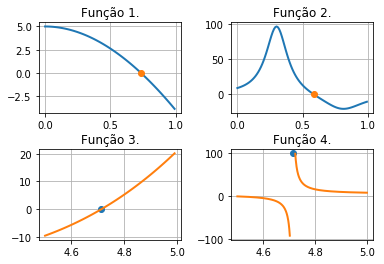

In [12]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(1)

plt.subplot(221)
t = np.arange(0.0, 1.0, 0.01)
s = f1(t)
plt.title('Função 1.')
line, = plt.plot(t, s, lw=2)
plt.plot(0.734588623046875, 0, 'o')
plt.grid(True)


plt.subplot(222)
t = np.arange(0.0, 1.0, 0.01)
s = f2(t)
plt.title('Função 2.')
line, = plt.plot(t, s, lw=2)
plt.plot(0.58203125, 0, 'o')
plt.grid(True)

plt.subplot(223)
plt.plot(4.712390899658203, 0, 'o')
t = np.arange(4.5, 5.0, 0.01)
s = f3(t)
plt.title('Função 3.')

line, = plt.plot(t, s, lw=2)
plt.grid(True)


plt.subplot(224)
plt.plot(4.71240234375, 100, 'o')
t = np.arange(4.5, 5.0, 0.001)
s = f6(t)


threshold = 100
s[s>threshold] = np.inf
s[s<-threshold] = np.inf

plt.title('Função 4.')

line, = plt.plot(t, s, lw=2)
plt.grid(True)
plt.subplots_adjust(hspace=0.4, wspace=0.35)
plt.show()
#fig.savefig("formato.png")

In [11]:
s

array([ -0.13733205,  -0.15894176,  -0.18076317,  -0.20279932,
        -0.22505331,  -0.24752827,  -0.27022744,  -0.29315407,
        -0.31631152,  -0.33970318,  -0.36333253,  -0.38720311,
        -0.41131854,  -0.43568249,  -0.46029872,  -0.48517107,
        -0.51030346,  -0.53569987,  -0.56136438,  -0.58730116,
        -0.61351443,  -0.64000856,  -0.66678794,  -0.69385712,
        -0.7212207 ,  -0.74888339,  -0.77685001,  -0.80512548,
        -0.83371483,  -0.86262318,  -0.8918558 ,  -0.92141803,
        -0.95131537,  -0.98155341,  -1.0121379 ,  -1.04307468,
        -1.07436975,  -1.10602924,  -1.13805942,  -1.17046671,
        -1.20325766,  -1.23643899,  -1.27001758,  -1.30400046,
        -1.33839484,  -1.37320809,  -1.40844776,  -1.44412159,
        -1.48023751,  -1.51680362,  -1.55382826,  -1.59131994,
        -1.6292874 ,  -1.66773959,  -1.7066857 ,  -1.74613514,
        -1.78609757,  -1.82658289,  -1.86760126,  -1.90916311,
        -1.95127914,  -1.99396033,  -2.03721796,  -2.08